In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [654]:
# Read our data from csv file
data = pd.read_csv('data.csv', header=None)
pd.set_option('display.max_rows', 500)

In [655]:
# Create dataset from Pandas dataframe
X = data.loc[:,0:1]
y = data.loc[:,2]


In [656]:
# Convert dataset to Numpy
X = X.to_numpy()
y = y.to_numpy()
X_min = X[:,0].min()
X_max = X[:,0].max()

In [657]:
# Helper functions to make a prediction
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [658]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [659]:
data_positive = data.loc[data[2]==1]
data_negative = data.loc[data[2]==0]
X_positive = data_positive.loc[:,0:1]
X_negative = data_negative.loc[:,0:1]

# This function runs the perceptron algorithm repeatedly on the dataset,
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=10):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max

    plt.scatter(X_positive[0], X_positive[1], c='blue')
    plt.scatter(X_negative[0], X_negative[1], c='red')
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step to update W & b
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
        #print(f"Training epoch: #{i+1}")
        #print(f"Weight: {W}")
        #print(f"bias: {b}")
        color = [1 - 0.92 ** (num_epochs-i) for _ in range(3)]
        plt.plot([X_min, X_max],[(-X_min * W[0][0]/W[1][0]) - (b/W[1][0]), (-X_max * W[0][0]/W[1][0]) - (b/W[1][0])], color=color)

    return W, b

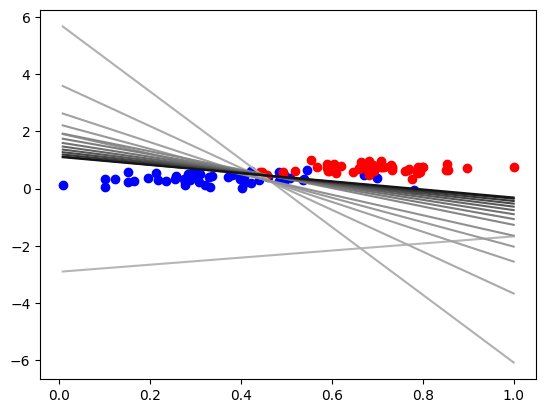

In [660]:
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
model_train = trainPerceptronAlgorithm(X, y, 
                                 learn_rate=0.02, 
                                 num_epochs=15)

In [661]:
# Make a prediction from the model training
final_model = model_train
weight, bias = final_model

print(f"weight: {weight}")
print(f"bias: {bias}")

weight: [[-0.40001228]
 [-0.28168285]]
bias: 0.3119939418114037


In [662]:
prediction(X=[0, 0], W=weight, b=bias)

1